Давайте познакомимся с приближением ряда скользящим средним на примере биржевых котировок акций компании Uniqlo

In [2]:
# импорт библиотек и датасета
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('uniqlo.csv')


In [0]:
# посмотрим глазами на начало датасета
# можно увидеть, что данные отсортированы в обратном порядке
# кроме того, данных за некоторые дни нет (например, 2016-12-18)
df.head(15)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
5,2016-12-22,43660,43840,43190,43480,381600,16586491000
6,2016-12-21,43900,44370,43610,44000,658900,28994316000
7,2016-12-20,42910,43630,42860,43620,499400,21606102000
8,2016-12-19,42790,43150,42740,43130,358700,15428531000
9,2016-12-16,43350,43550,42810,43130,542000,23380606000


In [0]:
# приведем формата даты к стандарту datetime. 
# это стандартный тип данных, который позволит нам красиво отображать графики по временнЫм осям
# и делать разные операции, например заполнять недостающие данные по дням
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.head(5)


,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [0]:
# переименуем индексы строк в даты
df = df.set_index(pd.DatetimeIndex(df['Date']))
# столбец Date нам больше не нужен, удалим его
df.drop(['Date'], axis =1, inplace = True)
df.head(5)

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,43310,43660,43090,43340,358200,15547803000


In [0]:
# заполним данные по пропущенным дням
# метод resample('d') выполняет группировку данных по дням,
# а ffill заполнит получившиеся пропуски, взяв предыдущее значение вместо пропущенного
df = df.resample('d').ffill()
print(df.isnull().sum()) # проверим, что пропущенных дней больше нет
df.tail(15) # полюбуемся на результат предварительной обработки

Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64


,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-16,43350,43550,42810,43130,542000,23380606000
2016-12-17,43350,43550,42810,43130,542000,23380606000
2016-12-18,43350,43550,42810,43130,542000,23380606000
2016-12-19,42790,43150,42740,43130,358700,15428531000
2016-12-20,42910,43630,42860,43620,499400,21606102000
2016-12-21,43900,44370,43610,44000,658900,28994316000
2016-12-22,43660,43840,43190,43480,381600,16586491000
2016-12-23,43660,43840,43190,43480,381600,16586491000
2016-12-24,43660,43840,43190,43480,381600,16586491000


In [0]:
# создадим отдельный Series для цен открытия биржи
OpenPrice = df.Open
OpenPrice.head()

Date
2012-01-04    14050
2012-01-05    13720
2012-01-06    13990
2012-01-07    13990
2012-01-08    13990
Freq: D, Name: Open, dtype: int64

Нарисуем приближение простым скользящим средним с шириной окна 2

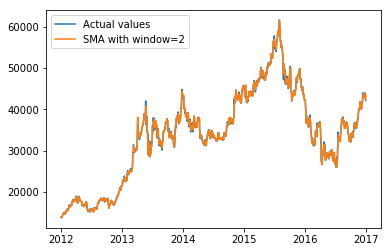

In [0]:
# метод rolling умеет делать скользящие преобразования. 
# Параметр window задает ширину окна, а mean() говорит, что в окне нужно взять среднее арифметическое
result1 = OpenPrice.rolling(window = 2).mean()
# Нарисуем красивый график
plt.plot(OpenPrice,label="Actual values")
plt.plot(result1,label="SMA with window=2")
plt.legend(loc="upper left")
plt.show()

Нарисуем приближение простым скользящим средним с шириной окна 10

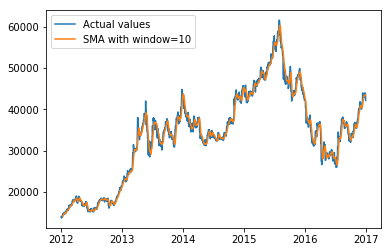

In [0]:
result2 = OpenPrice.rolling(window = 10).mean()
plt.plot(OpenPrice,label="Actual values")
plt.plot(result2,label="SMA with window=10")
plt.legend(loc="upper left")
plt.show()

Нарисуем приближение простым скользящим средним с шириной окна 50.

Можно заметить, что оранжевый график приближения начинается позже графика истинных значений.

Подумайте, почему так получается?

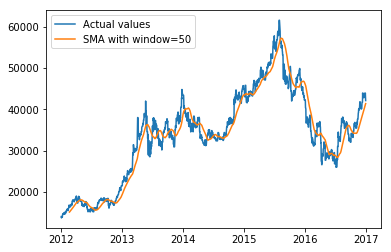

In [0]:
result3 = OpenPrice.rolling(window = 50).mean()
plt.plot(OpenPrice,label="Actual values")
plt.plot(result3,label="SMA with window=50")
plt.legend(loc="upper left")
plt.show()

# 7.6. Практика. Скользящее среднее

In [25]:
# импорт библиотек и датасета
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vremenie_ryadi/solarpower_cumuldaybyday2.csv')


In [26]:
# посмотрим глазами на начало датасета
df.head(15)

,date,cum_power,Unnamed: 2
0,26/10/2011,0.1,NaN
1,27/10/2011,10.2,NaN
2,28/10/2011,20.2,NaN
3,29/10/2011,29.6,NaN
4,30/10/2011,34.2,NaN
5,31/10/2011,38.0,NaN
6,1/11/2011,46.6,NaN
7,2/11/2011,51.6,NaN
8,3/11/2011,58.6,NaN
9,4/11/2011,60.5,NaN


In [27]:
# приведем формата даты к стандарту datetime. 
# это стандартный тип данных, который позволит нам красиво отображать графики по временнЫм осям
# и делать разные операции, например заполнять недостающие данные по дням
df['date'] = pd.to_datetime(df['date'])
df.head(15)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1180\305099311.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


,date,cum_power,Unnamed: 2
0,2011-10-26,0.1,NaN
1,2011-10-27,10.2,NaN
2,2011-10-28,20.2,NaN
3,2011-10-29,29.6,NaN
4,2011-10-30,34.2,NaN
5,2011-10-31,38.0,NaN
6,2011-11-01,46.6,NaN
7,2011-11-02,51.6,NaN
8,2011-11-03,58.6,NaN
9,2011-11-04,60.5,NaN


In [28]:
# переименуем индексы строк в даты
df = df.set_index(pd.DatetimeIndex(df['date']))
# столбец Date нам больше не нужен, удалим его
df.drop(['date'], axis =1, inplace = True)
df.head(15)

,cum_power,Unnamed: 2
date,,
2011-10-26,0.1,NaN
2011-10-27,10.2,NaN
2011-10-28,20.2,NaN
2011-10-29,29.6,NaN
2011-10-30,34.2,NaN
2011-10-31,38.0,NaN
2011-11-01,46.6,NaN
2011-11-02,51.6,NaN
2011-11-03,58.6,NaN


In [38]:
df_week = df['2014-10-06' : '2014-10-12']
df_week

,cum_power,Unnamed: 2
date,,
2014-10-06,11680.0,NaN
2014-10-07,11684.0,NaN
2014-10-08,11692.0,NaN
2014-10-09,11697.0,NaN
2014-10-10,11708.0,NaN
2014-10-11,11716.0,NaN
2014-10-12,11721.0,NaN


In [43]:
df_week['cum_power']['2014-10-12'] - df_week['cum_power']['2014-10-06']

41.0